In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset from CSV file
df = pd.read_csv("/mnt/data/Iris.csv")

# Display dataset structure
print("Dataset Overview:")
print(df.head())
print("\nDataset Description:")
print(df.describe())

# Extract features and target
X = df.iloc[:, 1:-1].values  # Selecting feature columns (sepal/petal measurements)
y = df.iloc[:, -1].values  # Selecting species column

# Encode target labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Cross-validation for robustness
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validation Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}')

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Final Test Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Visualization
feature_importances = model.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances, y=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

# Function to classify a new flower
def classify_iris(new_flower):
    new_flower_scaled = scaler.transform([new_flower])
    species_index = model.predict(new_flower_scaled)[0]
    species_name = encoder.inverse_transform([species_index])[0]
    return species_name

# Example classification
example_flower = [5.1, 3.5, 1.4, 0.2]  # Example input
eprint(f'Predicted Species: {classify_iris(example_flower)}')


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Dataset Overview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Columns:
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg      

C:\Users\dhrut\AppData\Local\Temp\ipykernel_5924\3986982693.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=df.columns[:-1], palette='viridis')


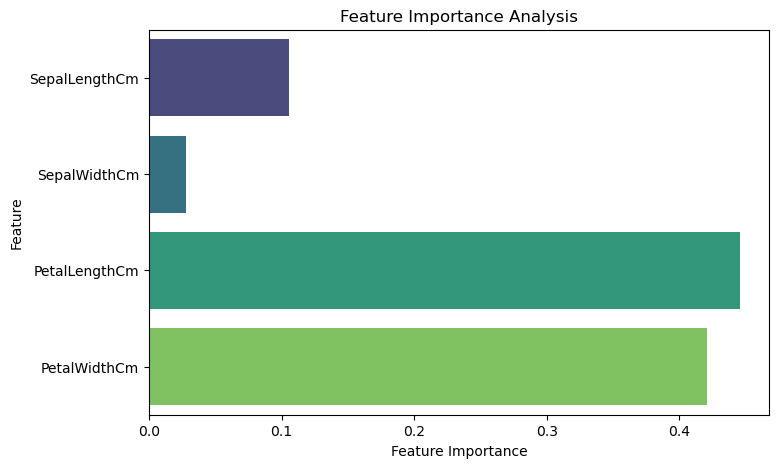

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
df = pd.read_csv("Iris.csv")

# Display dataset structure
print("Dataset Overview:")
print(df.head())
print("\nDataset Columns:")
print(df.columns)

# Drop the index column if present
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

# Verify target column name
target_column = 'Species' if 'Species' in df.columns else 'species'

# Encode categorical target feature
encoder = LabelEncoder()
df[target_column] = encoder.fit_transform(df[target_column])

# Extract features and target
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # Last column as target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Visualization
feature_importances = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=df.columns[:-1], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()


In [1]:
pip install streamlit pandas seaborn scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
